# **Exploratory Data Analysis (EDA) on Titanic Dataset**

#### **Objective** - Extract insights using visual and statistical exploration.

In [ ]:
# Load Req Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set()

In [ ]:
# Load datsets from seaborn load_datasets
df = sns.load_dataset('titanic')

In [ ]:
# Previewing the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape
# There are 891 rows & 15 columns in this datasets

(891, 15)

In [ ]:
# Listing down the columns
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#Few Conclusions
#1. Missing values in age, deck and embarked columns
#2. More than 70 percent values are missing in cabin columns, will have to drop

### Data Cleaning & Preprocessing

In [ ]:
# Dropping cabin columns
df.drop('deck', axis=1, inplace=True)

In [ ]:
# Removing embark_town missing values
df.dropna(subset=['embark_town'], inplace=True)

In [ ]:
# Imputting missing value for age columns
# with mean (numeric value)

df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
# Verify that any column doesn't have any null value
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
value_counts_sex = df['sex'].value_counts()
value_counts_sex
# There are 577 male and 312 female in Ship

,count
sex,
male,577
female,312


In [ ]:
value_counts_class = df['class'].value_counts()
value_counts_class

,count
class,
Third,491
First,214
Second,184


In [ ]:
# Summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization for identifying relation and trends

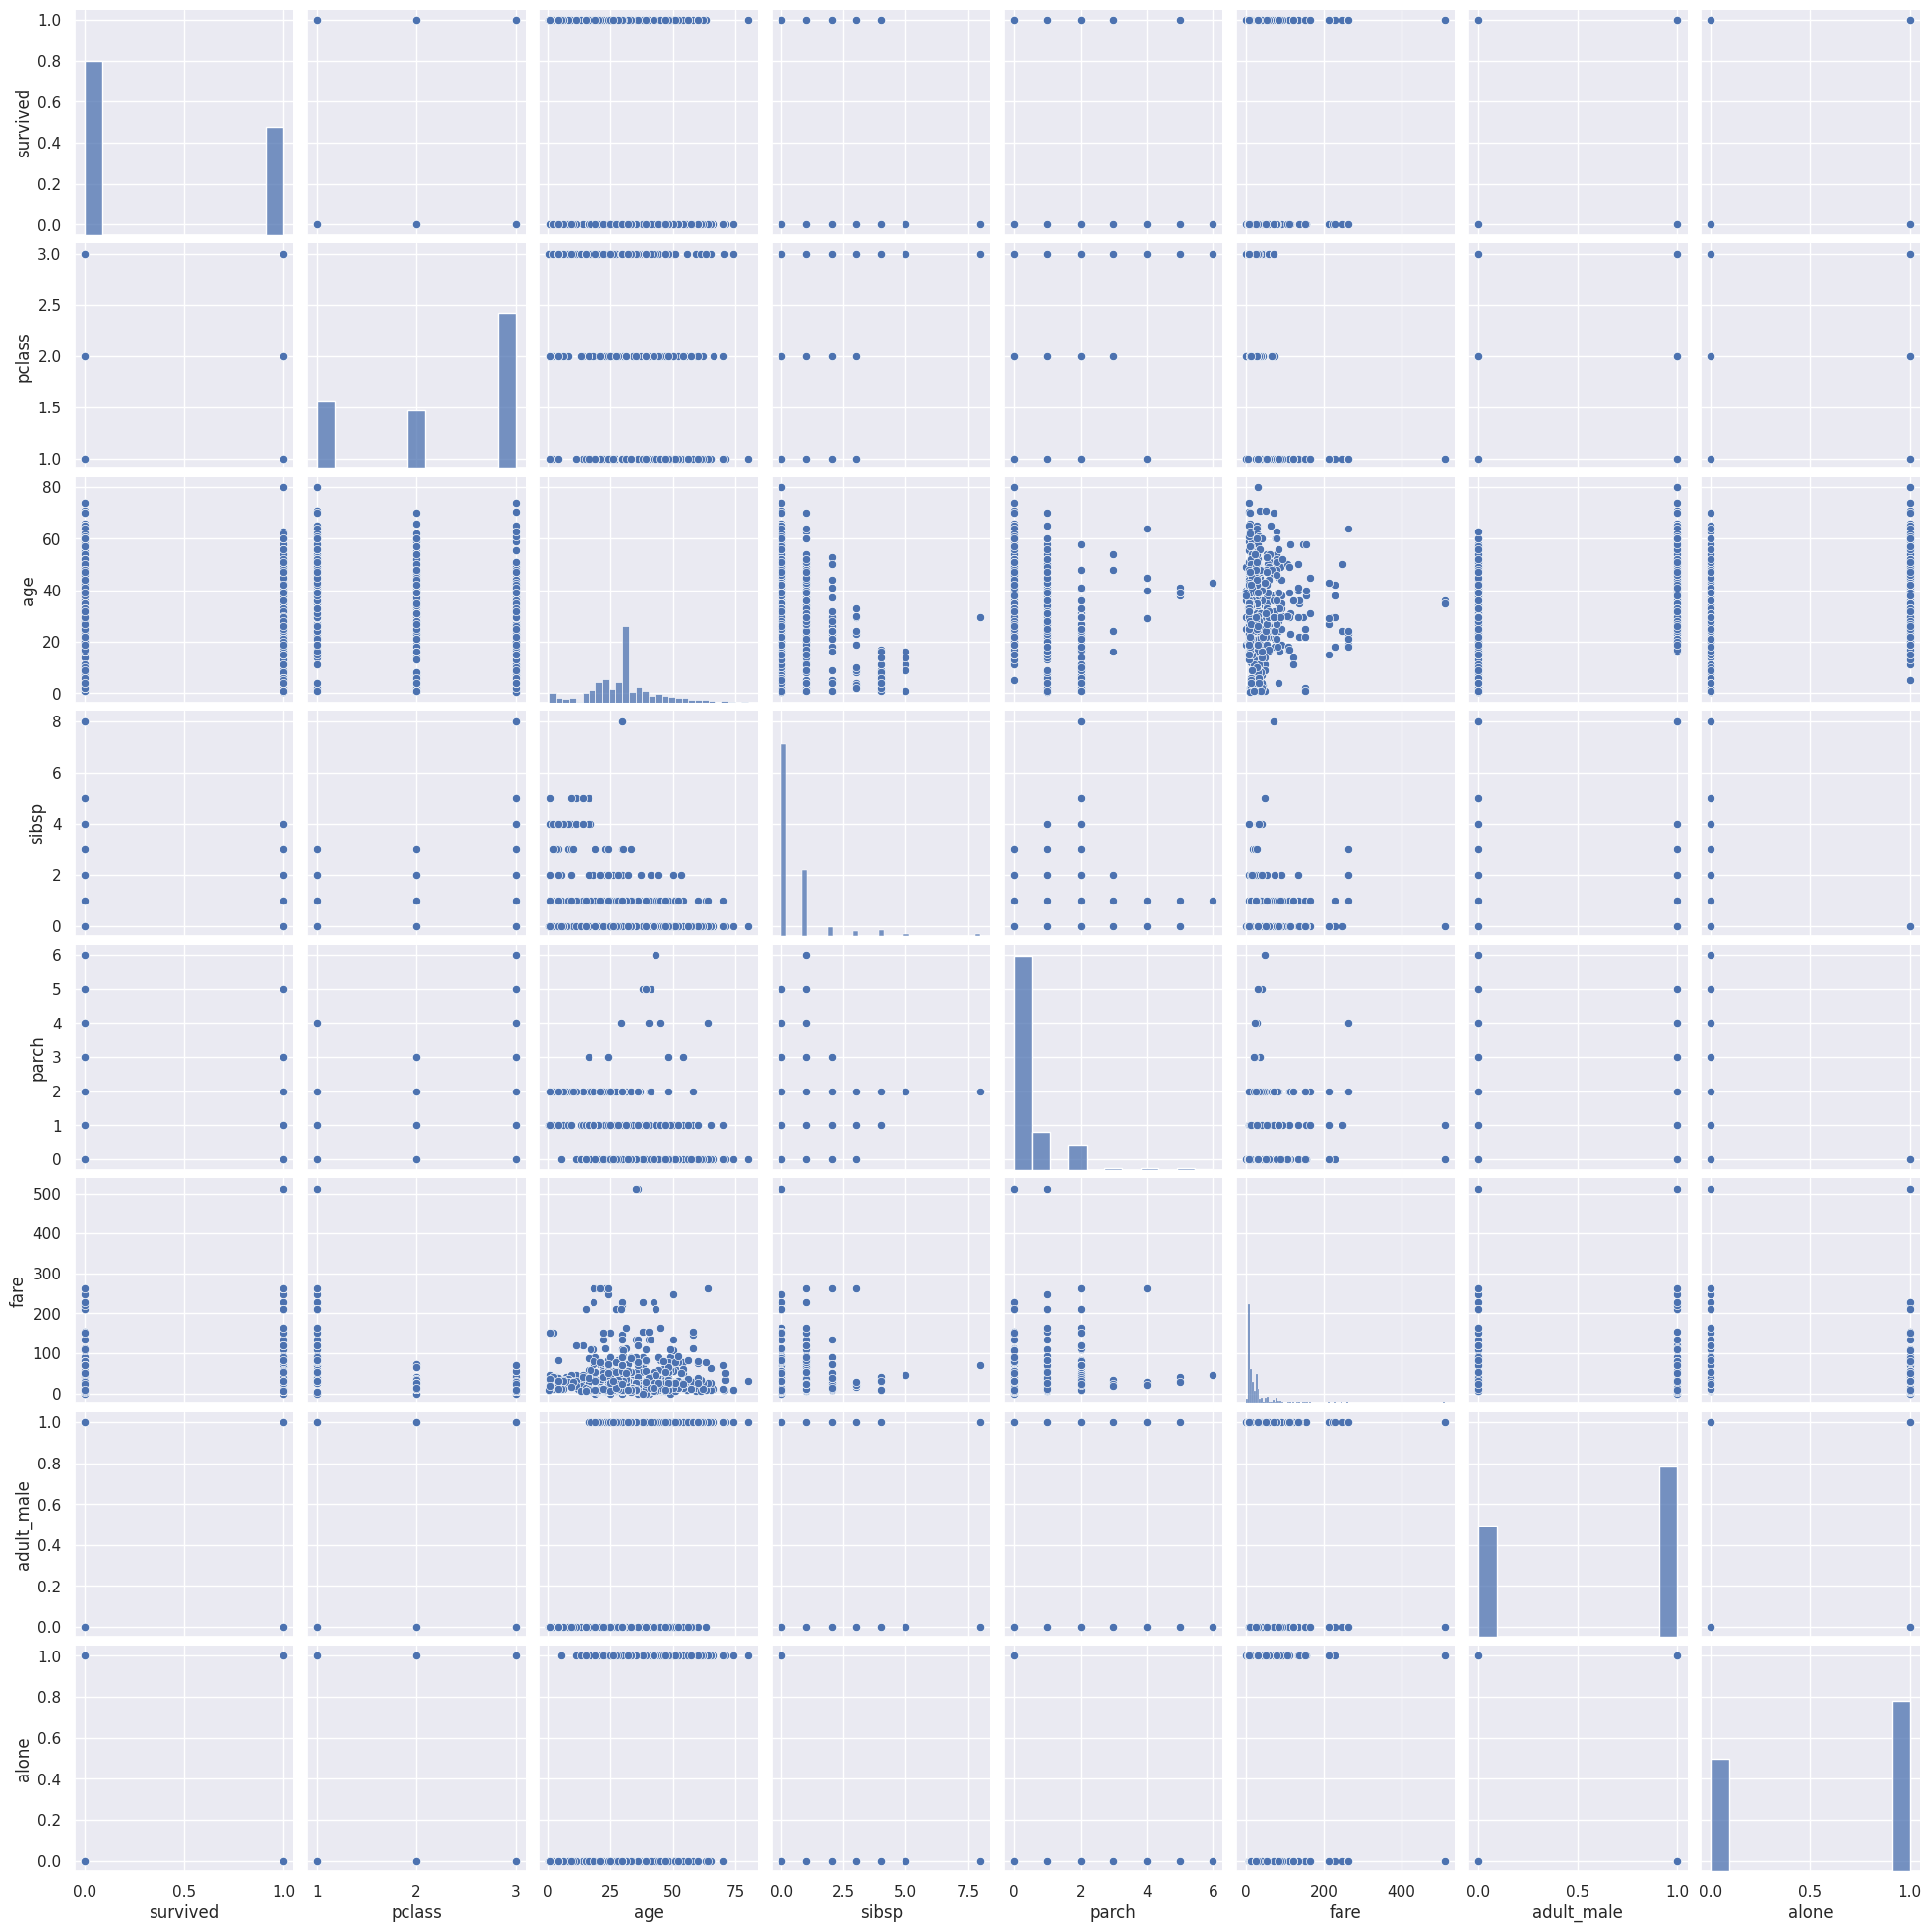

In [ ]:
#plot the pairplot for the titanic dataset
sns.pairplot(df)



```
# This is formatted as code
```

Pairplot Observation:
- Passengers in higher classes (lower pclass number) paid higher fares and had higher survival rates. Survival among young and elderly passengers varies.

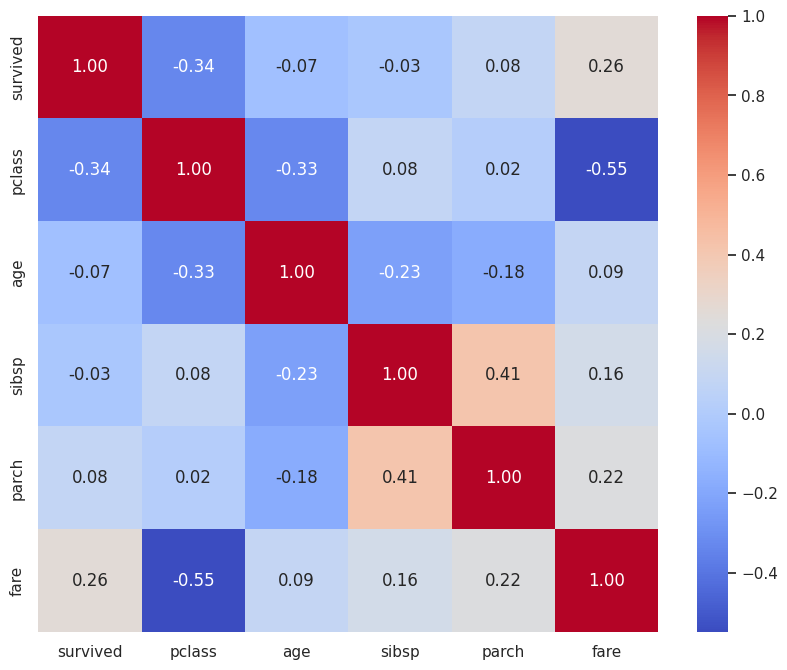

In [ ]:
# Select only numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Heatmap Observation:
- Survival is negatively correlated with pclass (higher class, higher survival) and positively with fare.
- Weak negative correlation with age.

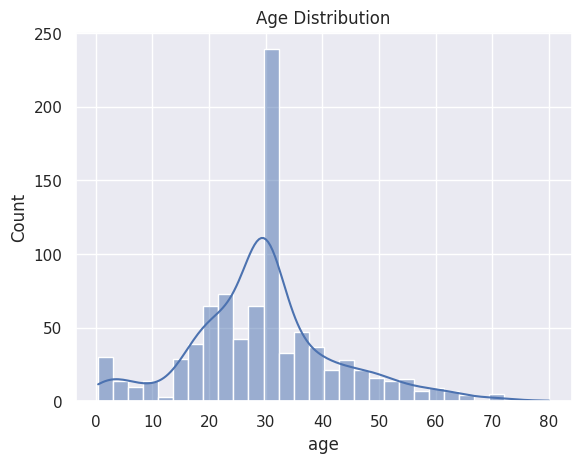

In [ ]:
# Plotting Histogram for age
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

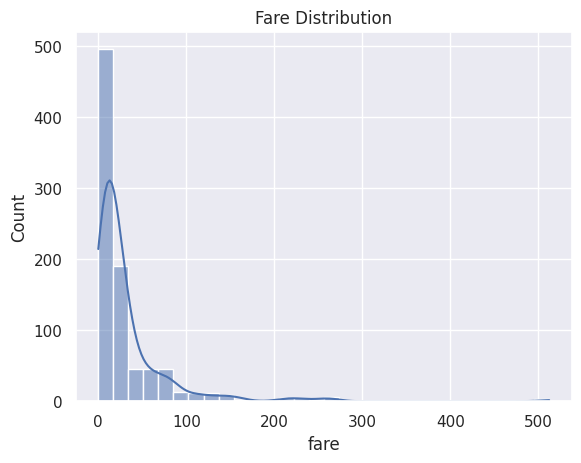

In [ ]:
# Plotting Histogram for fare
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

Observation from Histogram plot :
- Age: Right-skewed, most passengers between 20 and 40 years old. Some very young and elderly passengers.

- Fare: Highly right-skewed, with a small number of passengers paying very high fares.

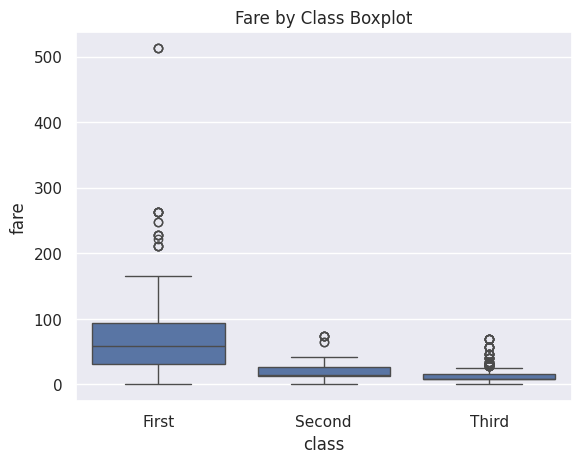

In [ ]:
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Class Boxplot')
plt.show()

Observation from Boxplot :
- Fare by Class: First class fares are significantly higher than second and third class. Large fare spread in first class.

Outlier Analysis

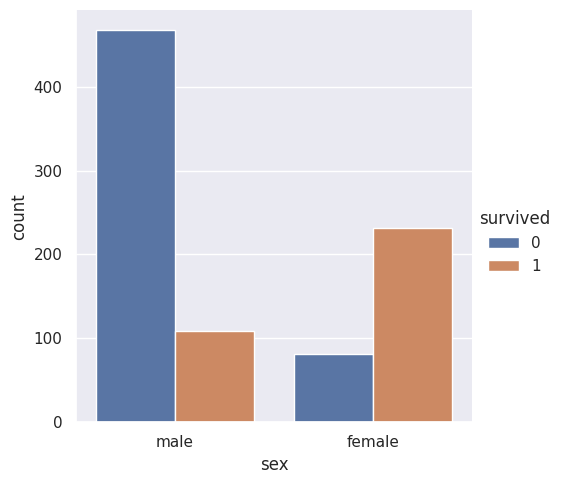

In [ ]:
# Countplot
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = df)
plt.show()

- Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%.

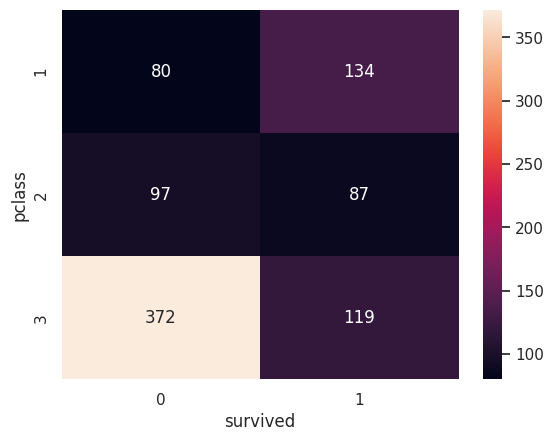

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()

# Plot Heatmap
sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.show()


- Just by observing the pclass survived graph, we destermine that higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3.

- from the box plot we clearly see that, in column age, sibsp and fare outlier. was prsent

## **Summary of Findings**

- Passenger class and fare are strong indicators of survival: Higher class and higher fare passengers had better survival rates.

- Age shows a weaker influence: Survival is less strongly correlated with age, though both young children and elderly are present among survivors and non-survivors.

- Distributional insights: Both age and fare are right-skewed, with a small number of passengers paying much higher fares than the rest.

## Conclusion

- The EDA demonstrates that passenger class and fare are the most significant predictors of survival in the Titanic dataset, while age and sex also play roles but with less direct correlation.